In [69]:
import pandas as pd
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.metrics import *
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns

# Первоначальный взгляд на данные

In [70]:
data = pd.read_csv('train.csv')

display(data)

print(data.info())


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Поменяем все категориальные фичи на числовой тип, для построения корреляции и выбора самых значимых параметров/фич

In [71]:
X = data.iloc[:, 1:]
y = data.iloc[:, -1]


for i in X.columns:
    if X[i].dtype != 'int':
        m = LabelEncoder()
        X[i] = m.fit_transform(X[i])

display(X)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,5,3,36,327,1,2,3,3,0,4,...,0,3,4,4,0,1,2,8,4,412
1,0,3,51,498,1,2,3,3,0,2,...,0,3,4,4,0,4,1,8,4,339
2,5,3,39,702,1,2,0,3,0,4,...,0,3,4,4,0,8,2,8,4,442
3,6,3,31,489,1,2,0,3,0,0,...,0,3,4,4,0,1,0,8,0,194
4,5,3,55,925,1,2,0,3,0,2,...,0,3,4,4,0,11,2,8,4,494
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,5,3,33,267,1,2,3,3,0,4,...,0,3,4,4,0,7,1,8,4,314
1456,0,3,56,866,1,2,3,3,0,4,...,0,3,2,4,0,1,4,8,4,415
1457,6,3,37,415,1,2,3,3,0,4,...,0,3,0,2,17,4,4,8,4,527
1458,0,3,39,505,1,2,3,3,0,4,...,0,3,4,4,0,3,4,8,4,199


Выбираем 12 фич для построения нашей будущей модели и строим тепловую карту корреляции между фичами и таргетом, для детального рассмотрения

c:\Users\Smart\PycharmProjects\Python_cool_libraries\.venv\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


,OverallQual,YearBuilt,ExterQual,BsmtQual,TotalBsmtSF,GrLivArea,FullBath,KitchenQual,GarageFinish,GarageCars,GarageArea
0,6,104,2,2,179,531,2,2,1,2,220
1,5,77,3,2,441,259,2,3,1,2,149
2,6,102,2,2,214,570,2,2,1,2,260
3,6,19,3,3,117,536,1,2,2,3,284
4,7,101,2,2,370,734,2,2,1,3,380
...,...,...,...,...,...,...,...,...,...,...,...
1455,5,100,3,2,238,489,2,3,1,2,149
1456,5,79,3,2,577,694,2,3,2,2,182
1457,6,44,0,3,375,767,2,2,1,1,24
1458,4,51,3,3,325,147,1,2,2,1,19


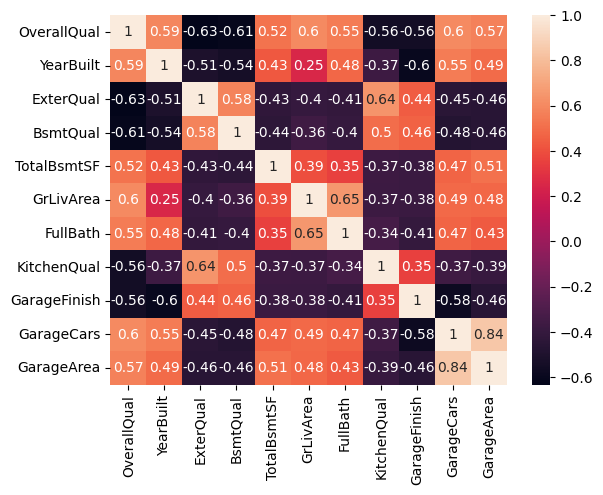

In [72]:
sel = SelectKBest(k = 12)

sel.fit(X, y)
sel.transform(X)

good_features = sel.get_feature_names_out()[:-1]

good_X = pd.DataFrame()
for i in good_features:
    good_X[i] = X[i]


display(good_X)
df_corr = good_X.corr()

sns.heatmap(df_corr, annot=True)
plt.show()


Построим обычную Линейную регрессию для предсказания цен и посмотрим на ее метрики качества

In [73]:
model = LinearRegression()


X_train, X_test, y_train, y_test = train_test_split(good_X, y, test_size=0.75, random_state=42)


model.fit(X_train, y_train)

model.predict(X_test)

print(model.coef_)
print('r2_score:')

print(r2_score(y_test, model.predict(X_test)))
print('rmse:')
print(root_mean_squared_error(y_test, model.predict(X_test)))


[ 15071.48240049     50.34206095  -6156.07665794  -6089.3124751
     53.50656696    109.59146767  -5038.74294643 -11764.16607925
  -3239.64121207   3450.02411387     87.26829801]
r2_score:
0.7806578623006762
rmse:
38180.183110471364


Коэффициенты линейной регрессии слишком большие, поэтому попробуем Ridge регуляризацию, для того, чтобы уменьшить веса коэффициентов

In [74]:
l = Ridge(alpha=11)

X_train, X_test, y_train, y_test = train_test_split(good_X, y, train_size=0.75)

l.fit(X_train, y_train)

l.predict(X_test)

print(l.coef_)
print('r2-score:')
print(r2_score(y_test, l.predict(X_test)))
print('rmse:')
print(root_mean_squared_error(y_test, l.predict(X_test)))



[ 14581.0107517      24.11343855  -8600.30295787  -9779.05828333
     64.84111039     99.1592381   -4515.88115224 -12391.51083315
  -3405.85510317   5606.79738369     66.46611687]
r2-score:
0.8090770755361836
rmse:
30670.88744941524


Что ж, коэффициенты большие и здесь, попробуем проанализировать данные и отсеять аномалии

# Избавляемся от аномалий и выбросов

Index(['OverallQual', 'YearBuilt', 'ExterQual', 'BsmtQual', 'TotalBsmtSF',
       'GrLivArea', 'FullBath', 'KitchenQual', 'GarageFinish', 'GarageCars',
       'GarageArea'],
      dtype='object')


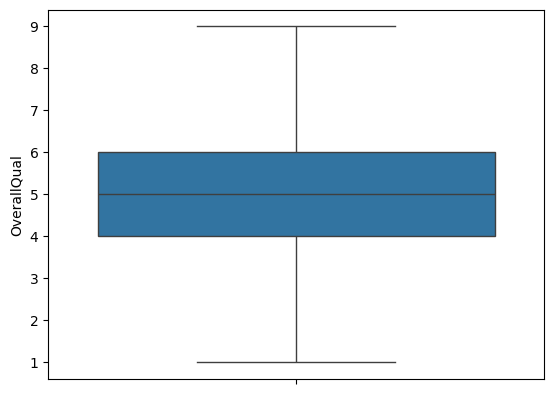

In [75]:
# OverallQual
print(good_X.columns)

new_data = good_X
new_data['price'] = y

new_data = new_data[
    (new_data['OverallQual'] >= 1) & (new_data['OverallQual'] <= 9)
]

sns.boxplot(new_data['OverallQual'])

plt.show()


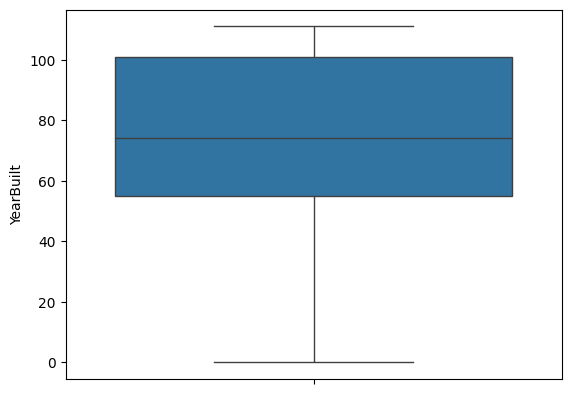

In [76]:
#YearBuilt

sns.boxplot(new_data['YearBuilt'])
plt.show()

Index(['OverallQual', 'YearBuilt', 'ExterQual', 'BsmtQual', 'TotalBsmtSF',
       'GrLivArea', 'FullBath', 'KitchenQual', 'GarageFinish', 'GarageCars',
       'GarageArea', 'price'],
      dtype='object')


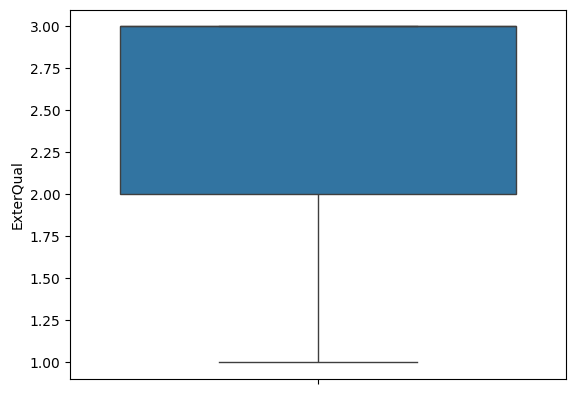

In [97]:
#ExterQual
print(new_data.columns)
new_data = new_data[
    (new_data['ExterQual'] >= 1)
]
sns.boxplot(new_data['ExterQual'])
plt.show()

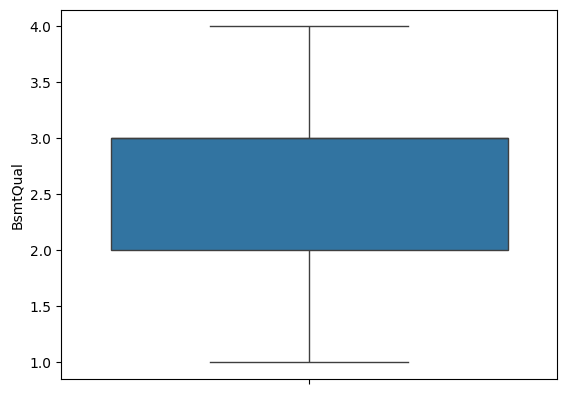

In [78]:
# BsmtQual
new_data = new_data[
    new_data['BsmtQual'] >= 1
]
sns.boxplot(new_data['BsmtQual'])
plt.show()

Index(['OverallQual', 'YearBuilt', 'ExterQual', 'BsmtQual', 'TotalBsmtSF',
       'GrLivArea', 'FullBath', 'KitchenQual', 'GarageFinish', 'GarageCars',
       'GarageArea', 'price'],
      dtype='object')


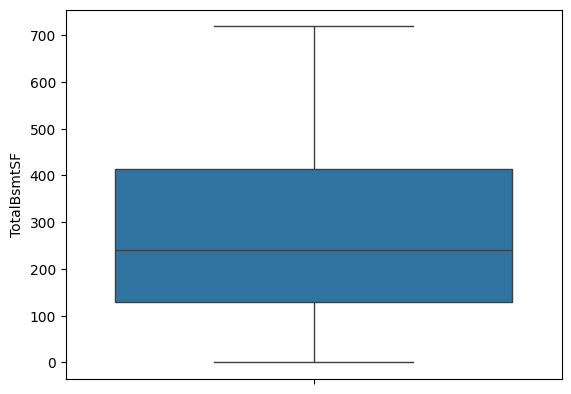

In [79]:
# TotalBsmtSF
print(new_data.columns)
sns.boxplot(new_data['TotalBsmtSF'])
plt.show()

Index(['OverallQual', 'YearBuilt', 'ExterQual', 'BsmtQual', 'TotalBsmtSF',
       'GrLivArea', 'FullBath', 'KitchenQual', 'GarageFinish', 'GarageCars',
       'GarageArea', 'price'],
      dtype='object')


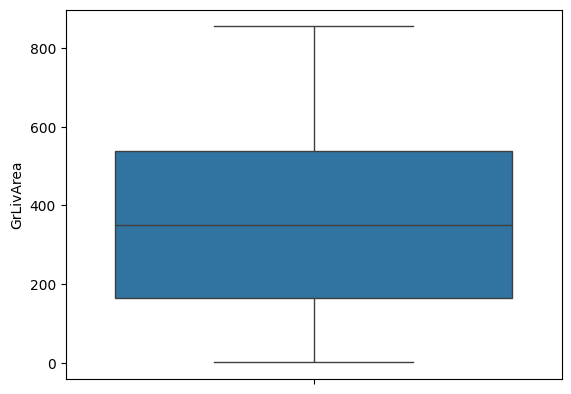

In [80]:
# GrLivArea
print(new_data.columns)
sns.boxplot(new_data['GrLivArea'])
plt.show()

Index(['OverallQual', 'YearBuilt', 'ExterQual', 'BsmtQual', 'TotalBsmtSF',
       'GrLivArea', 'FullBath', 'KitchenQual', 'GarageFinish', 'GarageCars',
       'GarageArea', 'price'],
      dtype='object')


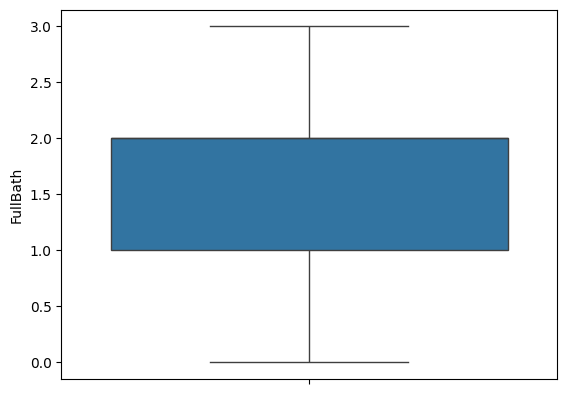

In [81]:
# FullBath
print(new_data.columns)
sns.boxplot(new_data['FullBath'])
plt.show()

Index(['OverallQual', 'YearBuilt', 'ExterQual', 'BsmtQual', 'TotalBsmtSF',
       'GrLivArea', 'FullBath', 'KitchenQual', 'GarageFinish', 'GarageCars',
       'GarageArea', 'price'],
      dtype='object')


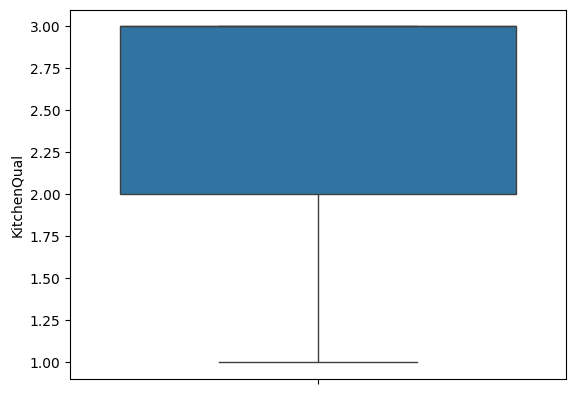

In [82]:
# KitchenQual

new_data = new_data[
    new_data['KitchenQual']>=1
]
print(new_data.columns)
sns.boxplot(new_data['KitchenQual'])
plt.show()

Index(['OverallQual', 'YearBuilt', 'ExterQual', 'BsmtQual', 'TotalBsmtSF',
       'GrLivArea', 'FullBath', 'KitchenQual', 'GarageFinish', 'GarageCars',
       'GarageArea', 'price'],
      dtype='object')


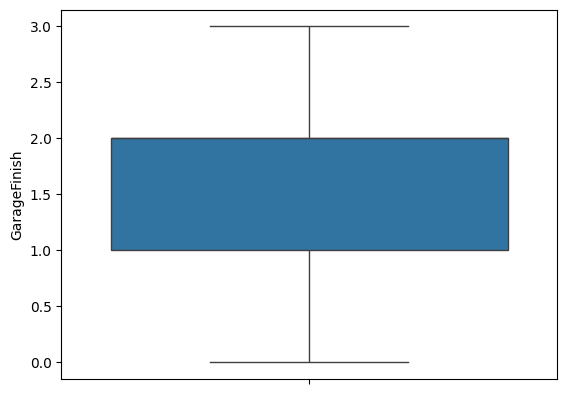

In [83]:
# GarageFinish

print(new_data.columns)
sns.boxplot(new_data['GarageFinish'])
plt.show()

Index(['OverallQual', 'YearBuilt', 'ExterQual', 'BsmtQual', 'TotalBsmtSF',
       'GrLivArea', 'FullBath', 'KitchenQual', 'GarageFinish', 'GarageCars',
       'GarageArea', 'price'],
      dtype='object')


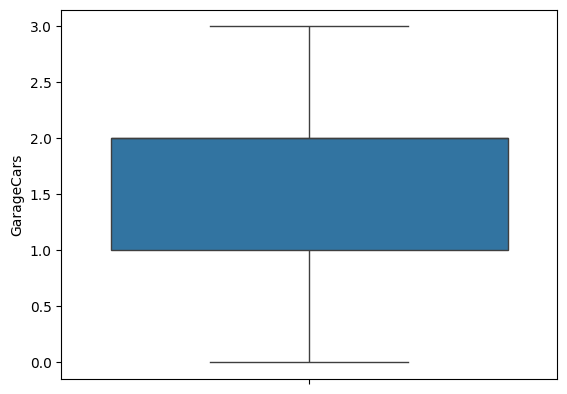

In [84]:
# GarageCars

print(new_data.columns)

new_data = new_data[
    new_data['GarageCars'] <= 3
]
sns.boxplot(new_data['GarageCars'])
plt.show()

Index(['OverallQual', 'YearBuilt', 'ExterQual', 'BsmtQual', 'TotalBsmtSF',
       'GrLivArea', 'FullBath', 'KitchenQual', 'GarageFinish', 'GarageCars',
       'GarageArea', 'price'],
      dtype='object')


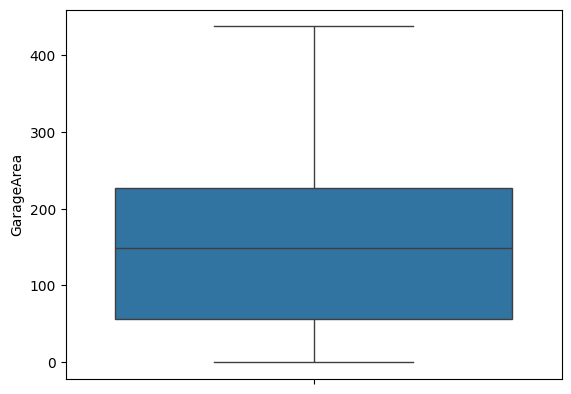

In [85]:
# GarageArea

print(new_data.columns)

sns.boxplot(new_data['GarageArea'])
plt.show()

Еще раз применим Ridge-регуляризацию

In [86]:
m = Ridge(alpha=100)

X = new_data.iloc[:, :-1]
y = new_data.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, shuffle=True, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

m.fit(X_train, y_train)


y_pred = m.predict(X_test)
print(m.coef_)

print('rmse:', end=' -> ')
print(root_mean_squared_error(y_pred, y_test))

print('r2:', end=' -> ')
print(r2_score(y_test, y_pred))



[13386.7135386   6734.16262398 -1801.0198005  -2305.54116295
 10048.14340872 19001.0337121  -1190.89187152 -3699.00310004
 -4501.52014625  2673.8782463   5339.2654999 ]
rmse: -> 28440.779748010274
r2: -> 0.7711942825300098


Попробуем что-нибудь помощнее, скажем, случайный лес

In [87]:
r = RandomForestRegressor(criterion='squared_error')

X = new_data.iloc[:, :-1]
y = new_data.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, shuffle=True, random_state=42)


scaler = StandardScaler()
# Применяем StandardScaler для масштабирования фичей
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

r.fit(X_train, y_train)


y_pred = r.predict(X_test)
print(m.coef_)


print('rmse:', end=' -> ')
print(root_mean_squared_error(y_pred, y_test))

print('r2:', end=' -> ')
print(r2_score(y_test, y_pred))

[13386.7135386   6734.16262398 -1801.0198005  -2305.54116295
 10048.14340872 19001.0337121  -1190.89187152 -3699.00310004
 -4501.52014625  2673.8782463   5339.2654999 ]
rmse: -> 26338.5322734959
r2: -> 0.8037692722569


В целом, метрики получились хорошими, поэтому я думаю, что можно и здесь закончить и переходить к получению результатов на тестовых данных

# Предсказание на основе test.csv

In [96]:
# Чтение данных test.csv для предсказаний
test_data = pd.read_csv('test.csv')


X_test_data = test_data.iloc[:, 1:] 
for i in X_test_data.columns:
    if X_test_data[i].dtype == 'object':
        m = LabelEncoder()
        X_test_data[i] = m.fit_transform(X_test_data[i])


X_test_data = X_test_data[good_features] 

# Масштабирование данных
X_test_data_scaled = scaler.transform(X_test_data)

# Предсказания на тестовом наборе данных
test_predictions = r.predict(X_test_data_scaled)

# Сохранение предсказаний в CSV для отправки на Kaggle
output = pd.DataFrame({'Id': test_data['Id'], 'SalePrice': test_predictions})
output.to_csv('submission.csv', index=False)

print("Предсказания сохранены в файл submission.csv")


Предсказания сохранены в файл submission.csv
